In [68]:
from google.colab import files
uploaded = files.upload()

Saving CAR DETAILS FROM CAR DEKHO.csv to CAR DETAILS FROM CAR DEKHO (2).csv


In [69]:
import pandas as pd
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [70]:
# Checking shape and structure
print("Basic Dataset Info:")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")


Basic Dataset Info:
Rows: 4340
Columns: 8


In [71]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f" Duplicate Rows: {duplicate_rows}")

 Duplicate Rows: 763


In [72]:
# Check for missing/null values in each column
missing_values = df.isnull().sum()
print(" Missing Values per Column:\n")
print(missing_values)


 Missing Values per Column:

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [73]:
# Check data types and unique values in each column
print("\nColumn Data Types:\n")
print(df.dtypes)


Column Data Types:

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object


In [74]:
# fidning unique values
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

print("\nUnique values in categorical columns:")
for col in categorical_columns:
    print(f"\n{col} → {df[col].unique()}")


Unique values in categorical columns:

fuel → ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']

seller_type → ['Individual' 'Dealer' 'Trustmark Dealer']

transmission → ['Manual' 'Automatic']

owner → ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [75]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Confirm removal
print("\nAfter removing duplicates:")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Duplicate Rows: {duplicate_rows}")



After removing duplicates:
Rows: 3577
Columns: 8
Duplicate Rows: 0


In [76]:
# Selling price range breakdown to check for outliers
print("\nSelling Price Distribution:")
price_bins = [0, 100000, 300000, 500000, 1000000, 2000000, 5000000]
price_labels = ['< ₹1L', '₹1L–₹3L', '₹3L–₹5L', '₹5L–₹10L', '₹10L–₹20L', '> ₹20L']
df['price_range'] = pd.cut(df['selling_price'], bins=price_bins, labels=price_labels)

print(df['price_range'].value_counts().sort_index())


Selling Price Distribution:
price_range
< ₹1L         318
₹1L–₹3L      1274
₹3L–₹5L       851
₹5L–₹10L      888
₹10L–₹20L     190
> ₹20L         53
Name: count, dtype: int64


In [77]:
#Removing Outliers
# Remove rows where selling price > ₹20L (2000000 INR)
df = df[df['selling_price'] <= 2000000]

# Drop the helper 'price_range' column
df.drop(columns=['price_range'], inplace=True)

# Confirm shape after outlier removal
print(f"\nAfter removing outliers above ₹20L: {df.shape[0]} rows")


After removing outliers above ₹20L: 3521 rows


<ipython-input-77-cd9d9a3b9456>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['price_range'], inplace=True)


In [78]:
#Feature Engineering
# Create new column: car_age
current_year = 2025
df['car_age'] = current_year - df['year']

# Drop 'year' and 'name' columns
df.drop(columns=['year', 'name'], inplace=True)

# Preview the updated DataFrame
print("\nColumns after feature engineering and dropping:")
print(df.columns)
df.head()


Columns after feature engineering and dropping:
Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'car_age'],
      dtype='object')


<ipython-input-78-ae38ea18e6c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_age'] = current_year - df['year']
<ipython-input-78-ae38ea18e6c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['year', 'name'], inplace=True)


,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,18
1,135000,50000,Petrol,Individual,Manual,First Owner,18
2,600000,100000,Diesel,Individual,Manual,First Owner,13
3,250000,46000,Petrol,Individual,Manual,First Owner,8
4,450000,141000,Diesel,Individual,Manual,Second Owner,11


In [79]:
# Label Encode 'transmission'
df['transmission'] = df['transmission'].map({'Manual': 0, 'Automatic': 1})

print("\nEncoded 'transmission' values:")
print(df['transmission'].value_counts())



Encoded 'transmission' values:
transmission
0    3265
1     256
Name: count, dtype: int64


<ipython-input-79-8f68c10e2908>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmission'] = df['transmission'].map({'Manual': 0, 'Automatic': 1})


In [80]:
# Custom encoding for 'owner'
owner_map = {
    'First Owner': 0,
    'Second Owner': 1,
    'Third Owner': 2,
    'Fourth & Above Owner': 3,
    'Test Drive Car': 4
}

df['owner'] = df['owner'].map(owner_map)

print("\nEncoded 'owner' values:")
print(df['owner'].value_counts())



Encoded 'owner' values:
owner
0    2169
1     972
2     288
3      75
4      17
Name: count, dtype: int64


<ipython-input-80-faa7ff896519>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['owner'] = df['owner'].map(owner_map)


In [81]:
# One-Hot Encode 'fuel' and 'seller_type'
df = pd.get_dummies(df, columns=['fuel', 'seller_type'], drop_first=True)

# Preview updated DataFrame
print("\nAfter One-Hot Encoding:")
print(df.columns)
df.head()


After One-Hot Encoding:
Index(['selling_price', 'km_driven', 'transmission', 'owner', 'car_age',
       'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer'],
      dtype='object')


,selling_price,km_driven,transmission,owner,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer
0,60000,70000,0,0,18,False,False,False,True,True,False
1,135000,50000,0,0,18,False,False,False,True,True,False
2,600000,100000,0,0,13,True,False,False,False,True,False
3,250000,46000,0,0,8,False,False,False,True,True,False
4,450000,141000,0,1,11,True,False,False,False,True,False


In [82]:
import numpy as np

# Log-transform km_driven to reduce skew
df['km_driven'] = np.log1p(df['km_driven'])

# Quick check on transformation
print("\nSample of transformed 'km_driven':")
print(df['km_driven'].head())
df['km_driven'].describe()



Sample of transformed 'km_driven':
0    11.156265
1    10.819798
2    11.512935
3    10.736418
4    11.856522
Name: km_driven, dtype: float64


,km_driven
count,3521.000000
mean,10.877328
std,0.887396
min,0.693147
25%,10.534919
50%,11.034906
75%,11.407576
max,13.600583


In [83]:
from sklearn.model_selection import train_test_split

# Define target and feature set
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm split sizes
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")


Training set size: 2816 rows
Test set size: 705 rows


In [84]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
# Fiting only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [85]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [86]:
# Predict selling prices on the test set
y_pred = model.predict(X_test_scaled)


In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): ₹{mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:,.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): ₹160,689.58
Root Mean Squared Error (RMSE): ₹226,694.61
R² Score: 0.5386


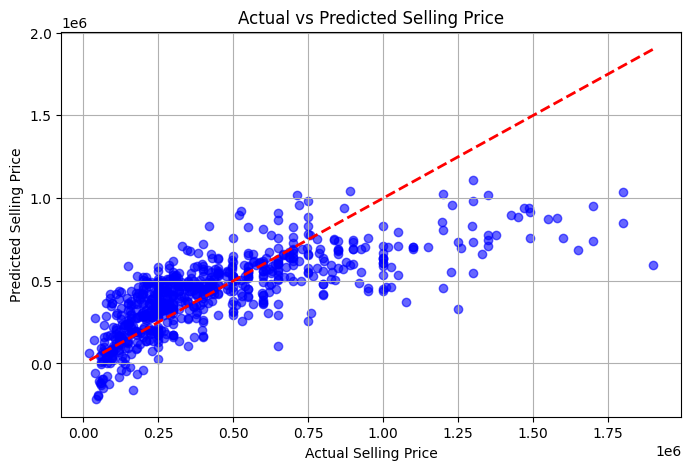

In [88]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()


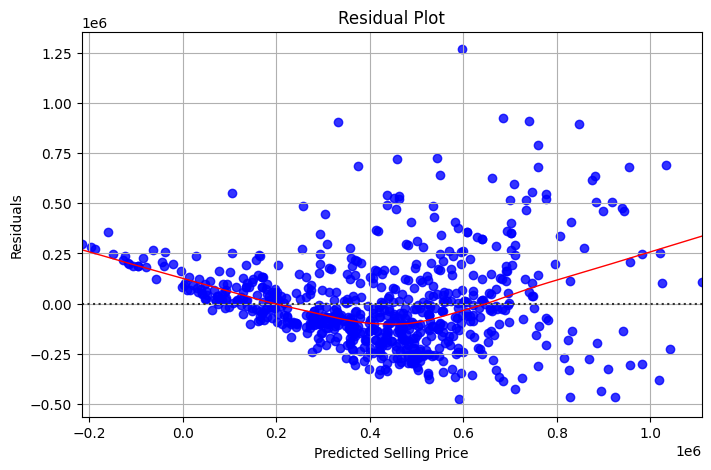

In [89]:
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()
